# Logistic Regression for Spam Email Classification


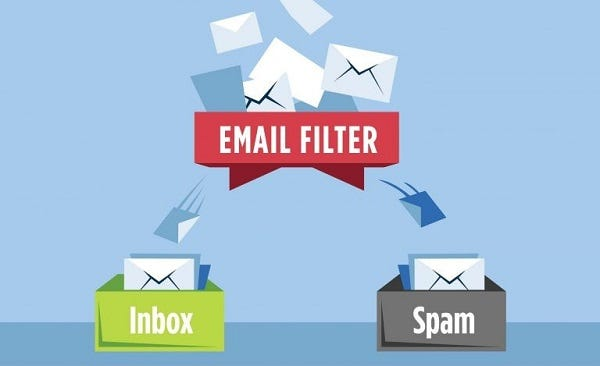

## Objective

Build a logistic regression model to classify emails as spam or non-spam (ham).

## Dataset

Download the "Spam or Ham" dataset from Kaggle: [Spam or Ham Dataset](https://www.kaggle.com/uciml/sms-spam-collection-dataset)


In [1]:
import numpy as np 
import pandas as pd 
import missingno as msno 
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score, classification_report
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
import seaborn as sns
import matplotlib.pyplot as plt 
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
import warnings

# Set up to avoid warnings
warnings.filterwarnings('ignore')

**Load the Dataset:**
   - Download the dataset from Kaggle.
   - Explore the dataset structure.
   
   --------

- Download the dataset from Kaggle.

In [2]:
#Import dataset 

df = pd.read_csv('../Spam Email Classification/Dataset/spam.csv' ,encoding='latin-1')
df

v1                                                 v2 Unnamed: 2  \
0      ham  Go until jurong point, crazy.. Available only ...        NaN   
1      ham                      Ok lar... Joking wif u oni...        NaN   
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3      ham  U dun say so early hor... U c already then say...        NaN   
4      ham  Nah I don't think he goes to usf, he lives aro...        NaN   
...    ...                                                ...        ...   
5567  spam  This is the 2nd time we have tried 2 contact u...        NaN   
5568   ham              Will Ì_ b going to esplanade fr home?        NaN   
5569   ham  Pity, * was in mood for that. So...any other s...        NaN   
5570   ham  The guy did some bitching but I acted like i'd...        NaN   
5571   ham                         Rofl. Its true to its name        NaN   

     Unnamed: 3 Unnamed: 4  
0           NaN        NaN  
1           NaN        NaN  
2           NaN        NaN  
3           NaN        NaN  
4           NaN        NaN  
...         ...        ...  
5567        NaN        NaN  
5568        NaN        NaN  
5569        NaN        NaN  
5570        NaN        NaN  
5571        NaN        NaN  

[5572 rows x 5 columns]

In [3]:
#Convert into dataframe

df = pd.DataFrame(df)

- Explore the dataset structure.

In [4]:
#shape

df.shape

(5572, 5)

In [5]:
#Class distribution 

df['v1'].value_counts()

v1
ham     4825
spam     747
Name: count, dtype: int64

<Axes: >

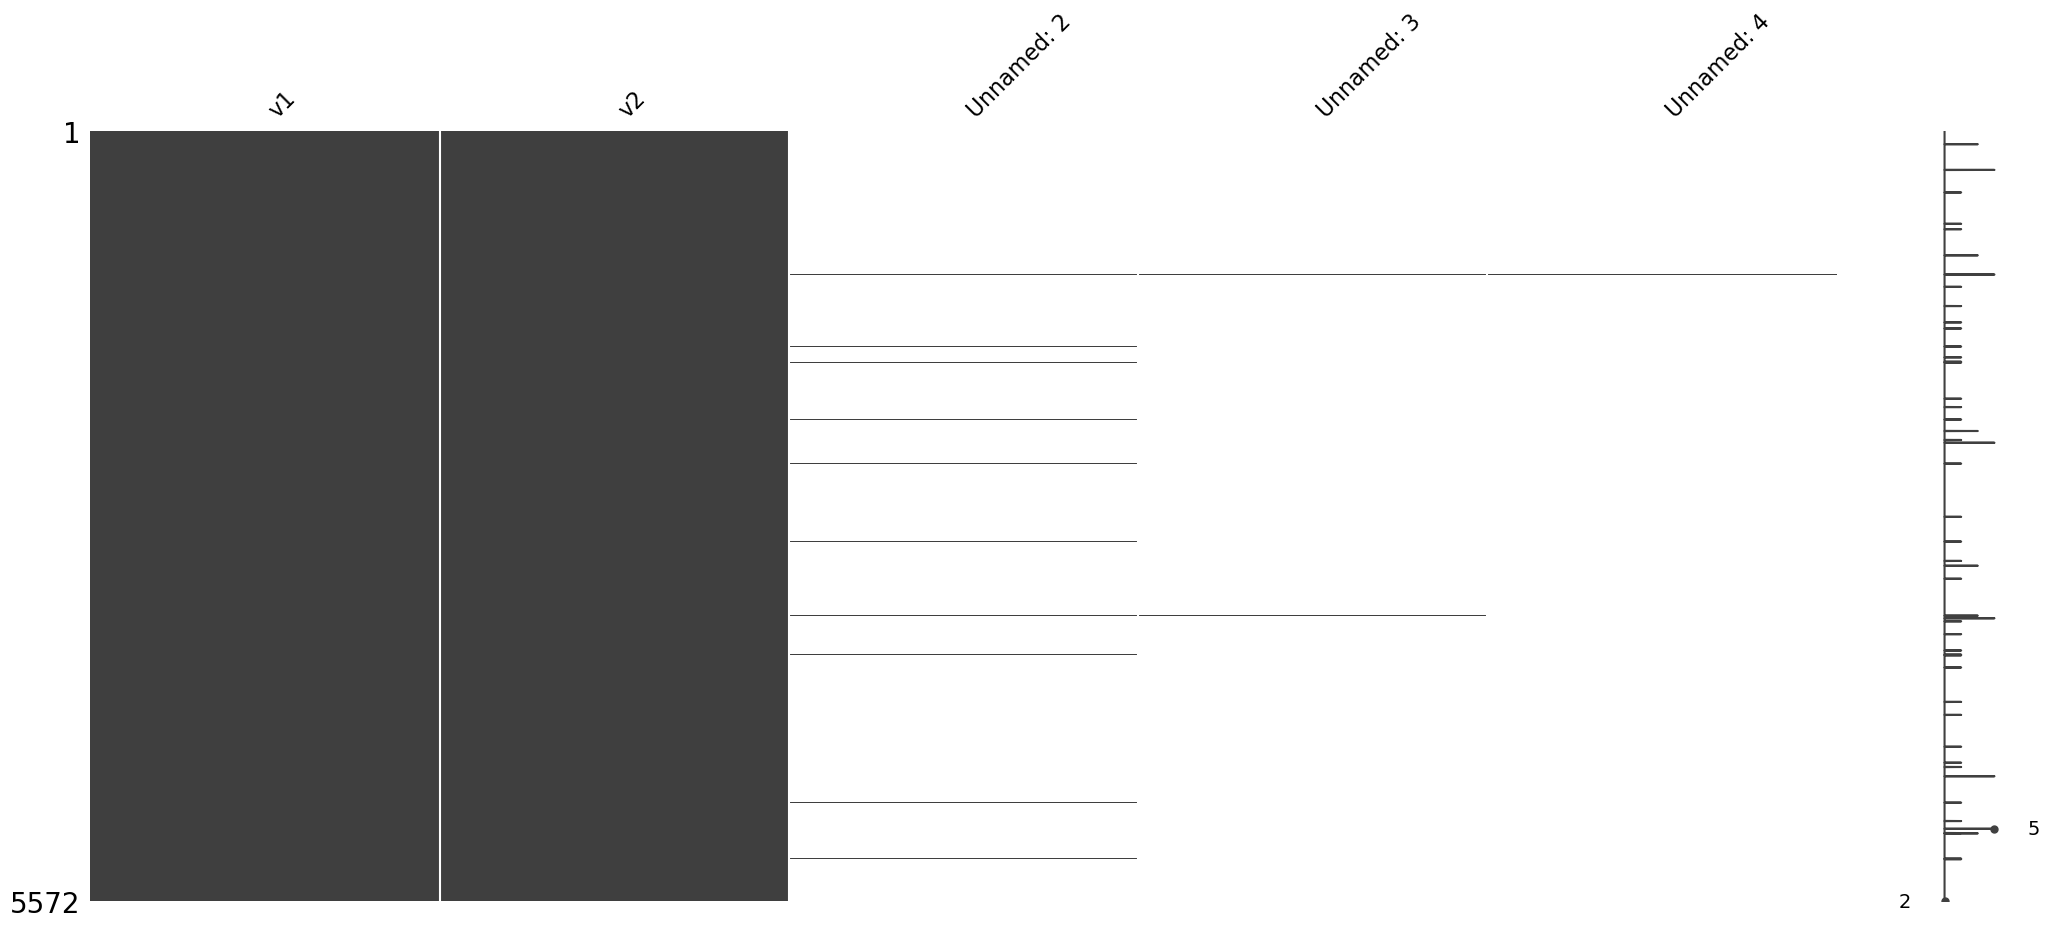

In [6]:
#missing values matrix

msno.matrix(df)

<Axes: ylabel='count'>

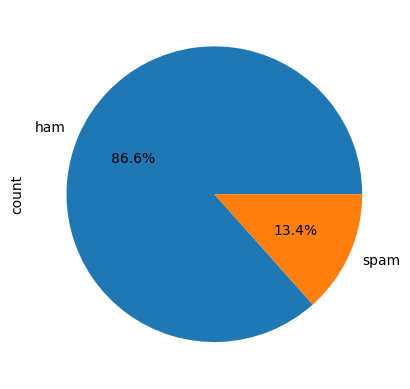

In [7]:
# Plot Class distribution

df['v1'].value_counts().plot.pie(autopct='%1.1f%%')

In [8]:
#Missing values count sorted

df.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [9]:
# Handling missing values 

missing_col = ['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4']
df.drop(missing_col, axis=1, inplace=True)

In [10]:
df

v1                                                 v2
0      ham  Go until jurong point, crazy.. Available only ...
1      ham                      Ok lar... Joking wif u oni...
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...
3      ham  U dun say so early hor... U c already then say...
4      ham  Nah I don't think he goes to usf, he lives aro...
...    ...                                                ...
5567  spam  This is the 2nd time we have tried 2 contact u...
5568   ham              Will Ì_ b going to esplanade fr home?
5569   ham  Pity, * was in mood for that. So...any other s...
5570   ham  The guy did some bitching but I acted like i'd...
5571   ham                         Rofl. Its true to its name

[5572 rows x 2 columns]

**Preprocess Text Data:**
   - Perform necessary text preprocessing steps such as tokenization, stemming, etc.
   _______

- Rename columns 

In [11]:
# Rename columns
df.rename(columns={'v1': 'Class',
                   'v2': 'email content'}, inplace=True)

- Class ( labels ) Encoding

- **'1'** indicates that the email is classified as spam.
- **'0'** denotes that the email is legitimate (ham).
text
This column contains the actual content of the email messages.

In [12]:
df['Class'] = [1 if col == 'spam' else 0 if col == 'ham' else None for col in df['Class']]

In [13]:
df.head()

Class                                      email content
0      0  Go until jurong point, crazy.. Available only ...
1      0                      Ok lar... Joking wif u oni...
2      1  Free entry in 2 a wkly comp to win FA Cup fina...
3      0  U dun say so early hor... U c already then say...
4      0  Nah I don't think he goes to usf, he lives aro...

- Separe features and targets 

In [14]:
#Features 
X = df['email content']

#Target 
y = df['Class']

- Perform necessary text preprocessing steps

[Video Tutoriel : Text Preprocessing | tokenization | cleaning | stemming | stopwords | lemmatization ](https://youtu.be/hhjn4HVEdy0)

#### Text Preprocessing Steps

Text data preprocessing is a crucial step in natural language processing (NLP) and machine learning tasks. It involves several key steps to prepare raw text data for analysis and modeling. Here's a brief description of each step:

| Step | Process | Description |
|------|---------|-------------|
| 1    | Text Preprocessing | - **Lowercasing:** Convert all text to lowercase for uniformity.<br>- **Encoding:** Convert text into a suitable encoding format, such as Unicode. |
| 2    | Tokenization | - **Tokenization:** Break the text into smaller units (tokens), such as words or phrases. |
| 3    | Cleaning | - **Removing Special Characters:** Eliminate unnecessary characters, symbols, or punctuation marks.<br>- **Handling Contractions:** Expand contractions for consistency.<br>- **Removing HTML Tags:** Eliminate HTML tags from the text.<br>- **Handling URLs:** Remove or replace URLs. |
| 4    | Stemming | - **Stemming:** Reduce words to their root form by removing suffixes. |
| 5    | Stopwords | - **Removing Stopwords:** Eliminate common words that do not carry significant meaning. |
| 6    | Lemmatization | - **Lemmatization:** Reduce words to their base or dictionary form for more meaningful analysis. |

##### Example:

Consider the following sentence: "The quick brown fox jumps over the lazy dog."

After applying the text preprocessing steps:

| Step | Process | Result |
|------|---------|--------|
| 1    | Text Preprocessing | The quick brown fox jumps over the lazy dog. |
| 2    | Tokenization | ['The', 'quick', 'brown', 'fox', 'jumps', 'over', 'the', 'lazy', 'dog'] |
| 3    | Cleaning | ['quick', 'brown', 'fox', 'jumps', 'lazy', 'dog'] |
| 4    | Stemming | ['quick', 'brown', 'fox', 'jump', 'lazi', 'dog'] |
| 5    | Stopwords | ['quick', 'brown', 'fox', 'jump', 'lazi', 'dog'] |
| 6    | Lemmatization | ['quick', 'brown', 'fox', 'jump', 'lazy', 'dog'] |

These preprocessing steps help transform the original sentence into a more structured and meaningful representation.


In [15]:

# Download NLTK resources (if not already downloaded)
nltk.download('punkt')
nltk.download('stopwords')


# Access the text data in the 'email content' column
X = df['email content']

# Tokenization
tokens = X.apply(word_tokenize)

# Convert to lowercase
tokens = tokens.apply(lambda x: [token.lower() for token in x])

# Remove stopwords
stop_words = set(stopwords.words('english'))
tokens = tokens.apply(lambda x: [token for token in x if token not in stop_words])

# Stemming
stemmer = PorterStemmer()
tokens = tokens.apply(lambda x: [stemmer.stem(token) for token in x])

# Resulting tokens after preprocessing
df['ProcessedText'] = tokens
print(df['ProcessedText'])

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/leondoungala/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/leondoungala/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


0       [go, jurong, point, ,, crazi, .., avail, bugi,...
1                  [ok, lar, ..., joke, wif, u, oni, ...]
2       [free, entri, 2, wkli, comp, win, fa, cup, fin...
3       [u, dun, say, earli, hor, ..., u, c, alreadi, ...
4       [nah, n't, think, goe, usf, ,, live, around, t...
                              ...                        
5567    [2nd, time, tri, 2, contact, u., u, å£750, pou...
5568                   [ì_, b, go, esplanad, fr, home, ?]
5569               [piti, ,, *, mood, ., ..., suggest, ?]
5570    [guy, bitch, act, like, 'd, interest, buy, som...
5571                                [rofl, ., true, name]
Name: ProcessedText, Length: 5572, dtype: object


In [16]:
#plot new dataset 

df

Class                                      email content  \
0         0  Go until jurong point, crazy.. Available only ...   
1         0                      Ok lar... Joking wif u oni...   
2         1  Free entry in 2 a wkly comp to win FA Cup fina...   
3         0  U dun say so early hor... U c already then say...   
4         0  Nah I don't think he goes to usf, he lives aro...   
...     ...                                                ...   
5567      1  This is the 2nd time we have tried 2 contact u...   
5568      0              Will Ì_ b going to esplanade fr home?   
5569      0  Pity, * was in mood for that. So...any other s...   
5570      0  The guy did some bitching but I acted like i'd...   
5571      0                         Rofl. Its true to its name   

                                          ProcessedText  
0     [go, jurong, point, ,, crazi, .., avail, bugi,...  
1                [ok, lar, ..., joke, wif, u, oni, ...]  
2     [free, entri, 2, wkli, comp, win, fa, cup, fin...  
3     [u, dun, say, earli, hor, ..., u, c, alreadi, ...  
4     [nah, n't, think, goe, usf, ,, live, around, t...  
...                                                 ...  
5567  [2nd, time, tri, 2, contact, u., u, å£750, pou...  
5568                 [ì_, b, go, esplanad, fr, home, ?]  
5569             [piti, ,, *, mood, ., ..., suggest, ?]  
5570  [guy, bitch, act, like, 'd, interest, buy, som...  
5571                              [rofl, ., true, name]  

[5572 rows x 3 columns]

In [17]:
Processed_df = df[['Class','ProcessedText']]

In [18]:
Processed_df = pd.DataFrame(Processed_df, columns=df.columns)
Processed_df

Class  email content                                      ProcessedText
0         0            NaN  [go, jurong, point, ,, crazi, .., avail, bugi,...
1         0            NaN             [ok, lar, ..., joke, wif, u, oni, ...]
2         1            NaN  [free, entri, 2, wkli, comp, win, fa, cup, fin...
3         0            NaN  [u, dun, say, earli, hor, ..., u, c, alreadi, ...
4         0            NaN  [nah, n't, think, goe, usf, ,, live, around, t...
...     ...            ...                                                ...
5567      1            NaN  [2nd, time, tri, 2, contact, u., u, å£750, pou...
5568      0            NaN                 [ì_, b, go, esplanad, fr, home, ?]
5569      0            NaN             [piti, ,, *, mood, ., ..., suggest, ?]
5570      0            NaN  [guy, bitch, act, like, 'd, interest, buy, som...
5571      0            NaN                              [rofl, ., true, name]

[5572 rows x 3 columns]

 **- Vectorize Text Data and Split Data:**
   - Divide the data into training and testing sets.
   - Use TF-IDF (Term Frequency-Inverse Document Frequency) to vectorize the text data.
   
   
[Calculate TF-IDF in NLP (Simple Example) : Tutoriel by "Data Science Garage"](https://youtu.be/vZAXpvHhQow)
_____

## TF-IDF (Term Frequency-Inverse Document Frequency)

- **Definition:**
  - Stands for Term Frequency-Inverse Document Frequency.
  - A method to convert text data into numerical vectors.

- **Term Frequency (TF):**
  - Measures the frequency of a term in a document.
  - Gives higher weight to frequently occurring terms in a document.

- **Inverse Document Frequency (IDF):**
  - Assesses the importance of a term across the entire dataset.
  - Assigns higher weight to terms that are rare across all documents.

- **Calculation:**
  - TF-IDF score = TF * IDF.
  - Combines local importance (in a document) and global importance (across all documents).

- **Representation:**
  - Each document is represented as a vector in a high-dimensional space.
  - TF-IDF scores serve as numerical values for words in the document.

- **Purpose:**
  - Useful for **text classification**, clustering, and information retrieval.
  - Captures the significance of terms within a document relative to their importance across the entire dataset.


In [19]:

# Convert the 'ProcessedText' column to strings (it's a list)
X = Processed_df['ProcessedText'].apply(lambda x: ' '.join(x) if isinstance(x, list) else x)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vectorize the 'ProcessedText' column using TF-IDF separately for training and testing sets
tfidf_vectorizer = TfidfVectorizer()  

X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Convert the TF-IDF matrices to DataFrames and add columns to Processed_df
X_train_tfidf_df = pd.DataFrame(X_train_tfidf.toarray(), columns=tfidf_vectorizer.get_feature_names_out())
X_test_tfidf_df = pd.DataFrame(X_test_tfidf.toarray(), columns=tfidf_vectorizer.get_feature_names_out())


 **- Implement Logistic Regression:**
   - Use the scikit-learn library to implement logistic regression.
   _____


In [20]:
#Define the logistic regression model 

logistic = LogisticRegression()

**- Train the Model:**
   - Train the logistic regression model on the training set.

In [21]:
#Train the model 

logistic.fit(X_train_tfidf , y_train)

LogisticRegression()

**- Evaluate the Model:**
   - Assess the model's performance on the training set.

In [22]:
y_predic_train = logistic.predict(X_train_tfidf)

print("Predicted Values ( Train dataset ) :")
print(y_predic_train)

Predicted Values ( Train dataset ) :
[0 0 0 ... 0 0 0]


 - Assess the model's performance on the testing set.

In [23]:
y_predic_test = logistic.predict(X_test_tfidf)

print("Predicted Values ( Test dataset ) :")
print(y_predic_test)

Predicted Values ( Test dataset ) :
[0 0 0 ... 0 0 1]


 **Performance Analysis:**
   - Analyze the model's performance using metrics like accuracy, precision, recall, and F1 score.


In [24]:
# Calculate precision, recall, and F1 Score on the test set
precision_test = precision_score(y_test, y_predic_test, average='binary')  
recall_test = recall_score(y_test, y_predic_test, average='binary')
f1_test = f1_score(y_test, y_predic_test, average='binary')
Accuracy_p = accuracy_score(y_test, y_predic_test)

# Print the metrics
print(f"- Precision on Test: {round(precision_test, 3)*100}","%")
print(f"- Recall on Test: {round(recall_test, 2)*100}","%")
print(f"- F1 Score on Test: {round(f1_test, 3)*100}","%")
print(f"- Accuracy on Test: {round(Accuracy_p, 3)*100}","%")

- Precision on Test: 96.39999999999999 %
- Recall on Test: 71.0 %
- F1 Score on Test: 82.0 %
- Accuracy on Test: 95.8 %


- Plot confusion matrix 

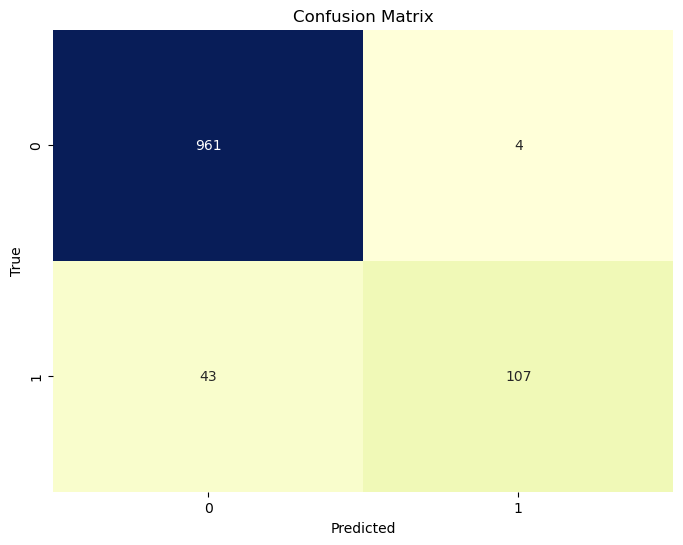

In [25]:
cm = confusion_matrix(y_test, y_predic_test)

# class_labels is a list of the class labels in dataset
class_labels = [0,1]

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="YlGnBu", cbar=False,
            xticklabels=class_labels, yticklabels=class_labels)

plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


**Fine-tune the Model:**
   - Explore opportunities for fine-tuning the model and improving performance if necessary.


In [26]:
# Define the parameter grid
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']
}

# Create the Logistic Regression model
model = LogisticRegression()

# Create the GridSearchCV object
grid_search = GridSearchCV(model, param_grid, cv=3)

# Fit the grid search 
grid_search.fit(X_train_tfidf_df, y_train)

# Print the best parameters 
print("Best Parameters:", grid_search.best_params_)

# Evaluate the model on the test set
accuracy = grid_search.score(X_test_tfidf_df, y_test)
print("Test Accuracy:", accuracy)


Best Parameters: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
Test Accuracy: 0.9775784753363229


- Define the Tuned logic regression model 

In [27]:
# Best Parameters
best_params = {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}

# Create Logistic Regression model
logreg_model_tuned = LogisticRegression(**best_params)

# Fit the model on the training data
logreg_model_tuned.fit(X_train_tfidf_df, y_train)

# Make predictions on the test set
y_pred = logreg_model_tuned.predict(X_test_tfidf_df)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_report_result = classification_report(y_test, y_pred)

# Print the results
print(f"Tuned Accuracy on test : {round(accuracy*100,2)}","%")

Tuned Accuracy on test : 97.76 %


In [28]:
print("Classification Report:\n", classification_report_result)

Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       965
           1       0.97      0.86      0.91       150

    accuracy                           0.98      1115
   macro avg       0.97      0.93      0.95      1115
weighted avg       0.98      0.98      0.98      1115



- Save the tuned model 

# Good , the model performance is Good ! 

In [29]:
import pickle

# Save the model logreg_model_tuned
model_tuned_filename = 'Spam Email Classification/models/logreg_model_tuned.pkl'
try:
    with open(model_tuned_filename, 'wb') as model_file:
        pickle.dump(logreg_model_tuned, model_file)
    print(f"Model saved successfully: {model_tuned_filename}")
except Exception as e:
    print(f"Error saving model {model_tuned_filename}: {e}")


Error saving model Spam Email Classification/models/logreg_model_tuned.pkl: [Errno 2] No such file or directory: 'Spam Email Classification/models/logreg_model_tuned.pkl'
